<a href="https://colab.research.google.com/github/nsagita47/Project-Lab-Susenas/blob/main/project_data_susenas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project-Lab-SUSENAS/susenas13/sn13_m41.csv')
data_kor = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project-Lab-SUSENAS/susenas13/sn13_ki.csv')

In [ ]:
data.head(12)

,Unnamed: 0,urut,b1r1,b1r5,b1r8,kode,b41k4,b41k5,b41k6,b41k7,b41k8,b41k9,klp,kalori,protein,lemak,karbo,b2r1,wert,weind
0,0,44085888.0,11,2,1,1,0.0,0,0.0,171680,0.0,171680,0,38031.0,889.875,152.25,8142.75,3,267.5273,802.582
1,1,44085888.0,11,2,1,2,0.0,0,10.5,171680,10.5,171680,1,38031.0,889.875,152.25,8142.75,3,267.5273,802.582
2,2,44085888.0,11,2,1,20,0.0,34000,0.0,0,0.0,34000,0,2632.0,448.000,80.00,0.00,3,267.5273,802.582
3,3,44085888.0,11,2,1,22,2.0,23000,0.0,0,2.0,23000,20,1808.0,272.000,72.00,0.00,3,267.5273,802.582
4,4,44085888.0,11,2,1,25,1.0,11000,0.0,0,1.0,11000,20,824.0,176.000,8.00,0.00,3,267.5273,802.582
5,5,44085888.0,11,2,1,85,0.0,26000,0.0,0,0.0,26000,0,289.8,10.950,3.88,48.33,3,267.5273,802.582
6,6,44085888.0,11,2,1,108,2.0,6000,0.0,0,2.0,6000,85,70.2,2.700,0.54,0.36,3,267.5273,802.582
7,7,44085888.0,11,2,1,110,5.0,17000,0.0,0,5.0,17000,85,132.0,4.250,1.30,31.05,3,267.5273,802.582
8,8,44085888.0,11,2,1,112,1.0,3000,0.0,0,1.0,3000,85,87.6,4.000,2.04,16.92,3,267.5273,802.582
9,9,44085888.0,11,2,1,151,0.0,8600,0.0,9000,0.0,17600,0,9671.6,50.600,743.68,208.40,3,267.5273,802.582


Variabel yang digunakan dalam project ini :

### Variabel Nutrisi 
*   B41K9 : Jumlah nilai/harga konsumsi makanan
*   B41K8 : Jumlah kuantitas konsumsi makanan
### Variabel Kesehatan
*   B5R1A - B5R1H : Pernah mengalami sakit dalam 1 bulan terakhir
*   B5R5 : Pernah berobat jalan 1 bulan terakhir
*   B5R7 : Pernah berobat jalan 6 bulan terakhir
### Variabel Geografis
*   B1R1 : Provinsi
*   B1R2 : Kota/Desa
*   B1R5 : Klasifikasi Desa/Kota
### Vriabel Pengeluaran 
*   EXP_CAP : Pengeluaran/kapita
*   B41K9 : Jumlah total pengeluaran makanan
### Identifier Makanan 
*   159 : Gula Pasir / Ons
*   160 : Gula Merah / Ons
*   152 : Minyak Kelapa / Liter 
*   153 : Minyak Jagung / Liter 
*   154 : Minyak Lainnya / Liter 
*   182 : Mie Instan / 80 gr
*   205 : Mie Bakso / Porsi 
*   206 : Mie Instan / Porsi 














# KONSUMSI GULA

Konsumsi Gula Pasir/Ons [159]

In [ ]:
gula_pasir = data[data['kode'] == 159]

gula_pasir = gula_pasir.loc[:, ['urut', 'kode', 'b41k8']]

Konsumsi Gula Merah/Ons [160]

In [ ]:
gula_merah = data[data['kode'] == 160]

gula_merah = gula_merah.loc[:, ['urut', 'kode', 'b41k8']]

In [ ]:
gulaqu = pd.concat([gula_pasir, gula_merah])
gulaqu.drop(['kode'], axis=1, inplace=True)
gulaqu = gulaqu.groupby('urut').sum()
gulaqu.reset_index(inplace=True)
gulaqu.head()

,urut,b41k8
0,27502310.0,15.0
1,30001248.0,5.0
2,32501339.0,10.0
3,35008484.0,5.0
4,35022456.0,2.5


In [ ]:
sakit_6 = data_kor.loc[:, ['urut', 'b5r7','weind']]
sakit_6.drop_duplicates(subset=['urut'], inplace=True)
sakit_6

,urut,b5r7,weind
0,2.750231e+07,2,328.766850
8,3.000125e+07,2,30.502945
12,3.250134e+07,2,65.848070
14,3.500848e+07,2,626.282040
19,3.502246e+07,1,1146.070900
...,...,...,...
274034,2.364676e+11,2,523.004640
274040,2.365029e+11,1,267.552060
274042,2.365501e+11,2,212.682130
274044,2.403726e+11,2,593.981260


In [ ]:
tabel_merge_gulaqu_sakit = gulaqu.merge(sakit_6, how='left', on='urut')
tabel_merge_gulaqu_sakit['b5r7'] = tabel_merge_gulaqu_sakit['b5r7'].map({1:'Ya',2:'Tidak'})
tabel_merge_gulaqu_sakit.rename(columns={ 'urut': 'Urut', 'b41k8': 'Total Konsumsi Gula (Ons)', 'b5r7': 'Pernah Berobat Jalan 6 Bulan Terakhir?', 'weind':'Weighting'}, inplace=True)
tabel_merge_gulaqu_sakit.drop_duplicates(subset=['Urut'], inplace=True)
tabel_merge_gulaqu_sakit

,Urut,Total Konsumsi Gula (Ons),Pernah Berobat Jalan 6 Bulan Terakhir?,Weighting
0,2.750231e+07,15.0,Tidak,328.766850
1,3.000125e+07,5.0,Tidak,30.502945
2,3.250134e+07,10.0,Tidak,65.848070
3,3.500848e+07,5.0,Tidak,626.282040
4,3.502246e+07,2.5,Ya,1146.070900
...,...,...,...,...
63597,2.364676e+11,10.0,Tidak,523.004640
63598,2.365029e+11,5.0,Ya,267.552060
63599,2.365501e+11,5.0,Tidak,212.682130
63600,2.403726e+11,5.0,Tidak,593.981260


# Jenis gula apa yang paling banyak dikonsumsi

In [ ]:
gula_pasir = data[data['kode'] == 159]

gula_pasir = gula_pasir.loc[:, ['urut', 'kode', 'b41k8', 'weind']]

gula_pasir['multiply'] = gula_pasir['b41k8']*gula_pasir['weind']

gula_pasir['multiply'].sum()

1386951979.6104822

In [ ]:
gula_merah = data[data['kode'] == 160]

gula_merah = gula_merah.loc[:, ['urut', 'kode', 'b41k8', 'weind']]

gula_merah['multiply'] = gula_merah['b41k8']*gula_merah['weind']

gula_merah['multiply'].sum()

111427830.89670987

In [ ]:
data_konsumsi_gula = {'Jenis Gula': ['Gula pasir', 'Gula Merah'], 
        'Jumlah Konsumsi Gula (Ons)': [gula_pasir['multiply'].sum(),gula_merah['multiply'].sum()]
        }

In [ ]:
total_konsumsi_jenis_gula = pd.DataFrame(data_konsumsi_gula)

In [ ]:
total_konsumsi_jenis_gula 

,Jenis Gula,Jumlah Konsumsi Gula (Ons)
0,Gula pasir,1.386952e+09
1,Gula Merah,1.114278e+08


<AxesSubplot:xlabel='Jenis Gula', ylabel='Jumlah Konsumsi Gula (Ons)'>

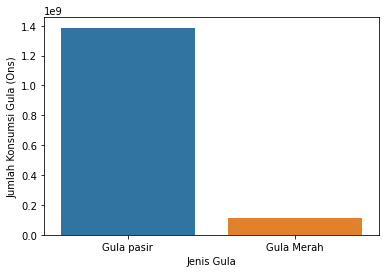

In [ ]:
sns.barplot(x = total_konsumsi_jenis_gula['Jenis Gula'], y= total_konsumsi_jenis_gula['Jumlah Konsumsi Gula (Ons)'])

# Konsumsi Gula perkotaan/pedesaan

In [ ]:
kotadesa = data[['urut', 'b1r5']]
kotadesa

,urut,b1r5
0,4.408589e+07,2
1,4.408589e+07,2
2,4.408589e+07,2
3,4.408589e+07,2
4,4.408589e+07,2
...,...,...
2899084,1.669035e+11,1
2899085,1.669035e+11,1
2899086,1.669035e+11,1
2899087,1.669035e+11,1


In [ ]:
tabel_kotadesa = tabel_merge_gulaqu_sakit.rename(columns={'Urut':'urut'})

In [ ]:
tabel_kotadesa = tabel_kotadesa.merge(kotadesa, how='left', on='urut')

In [ ]:
tabel_kotadesa.rename(columns={'b1r5': 'Kota/Desa', 'urut':'Urut'}, inplace=True)
tabel_kotadesa['Kota/Desa'] = tabel_kotadesa['Kota/Desa'].map({1:'Kota', 2:'Desa'})
tabel_kotadesa.drop_duplicates(subset=['Urut'], inplace=True)
tabel_kotadesa

,Urut,Total Konsumsi Gula (Ons),Pernah Berobat Jalan 6 Bulan Terakhir?,Weighting,Kota/Desa
0,2.750231e+07,15.0,Tidak,328.766850,Kota
27,3.000125e+07,5.0,Tidak,30.502945,Kota
49,3.250134e+07,10.0,Tidak,65.848070,Kota
76,3.500848e+07,5.0,Tidak,626.282040,Kota
118,3.502246e+07,2.5,Ya,1146.070900,Kota
...,...,...,...,...,...
2747399,2.364676e+11,10.0,Tidak,523.004640,Desa
2747435,2.365029e+11,5.0,Ya,267.552060,Desa
2747462,2.365501e+11,5.0,Tidak,212.682130,Desa
2747486,2.403726e+11,5.0,Tidak,593.981260,Desa


In [ ]:
summary_konsumsi_gula_kotadesa = tabel_kotadesa.groupby(['Kota/Desa']).mean()['Total Konsumsi Gula (Ons)']

Text(0, 0.5, 'Ons')

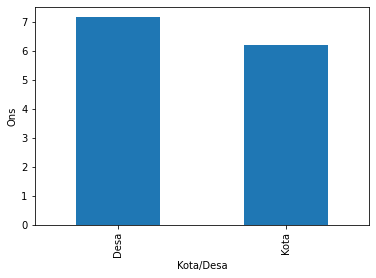

In [ ]:
summary_konsumsi_gula_kotadesa.plot.bar()
plt.ylabel('Ons')

# Distribusi berobat jalan kota/desa

In [ ]:
tabel_kotadesa

,Urut,Total Konsumsi Gula (Ons),Pernah Berobat Jalan 6 Bulan Terakhir?,Weighting,Kota/Desa
0,2.750231e+07,15.0,Tidak,328.766850,Kota
27,3.000125e+07,5.0,Tidak,30.502945,Kota
49,3.250134e+07,10.0,Tidak,65.848070,Kota
76,3.500848e+07,5.0,Tidak,626.282040,Kota
118,3.502246e+07,2.5,Ya,1146.070900,Kota
...,...,...,...,...,...
2747399,2.364676e+11,10.0,Tidak,523.004640,Desa
2747435,2.365029e+11,5.0,Ya,267.552060,Desa
2747462,2.365501e+11,5.0,Tidak,212.682130,Desa
2747486,2.403726e+11,5.0,Tidak,593.981260,Desa


In [ ]:
persentase_berobat_kotadesa = tabel_kotadesa.groupby(['Kota/Desa', 'Pernah Berobat Jalan 6 Bulan Terakhir?']).sum()['Weighting']
persentase_berobat_kotadesa

Kota/Desa  Pernah Berobat Jalan 6 Bulan Terakhir?
Desa       Tidak                                     2.156888e+07
           Ya                                        7.187480e+06
Kota       Tidak                                     2.039253e+07
           Ya                                        7.305313e+06
Name: Weighting, dtype: float64

Text(0, 0.5, 'Jumlah Penduduk (10 Juta)')

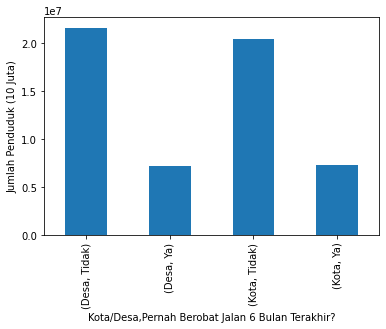

In [ ]:
persentase_berobat_kotadesa.plot.bar()
plt.ylabel('Jumlah Penduduk (10 Juta)')

<AxesSubplot:xlabel='Lokasi', ylabel='Persentase'>

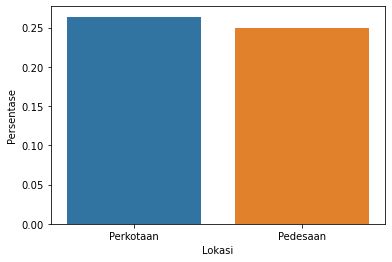

In [ ]:
persentase_berobat_desa = persentase_berobat_kotadesa['Desa']['Ya']/(persentase_berobat_kotadesa['Desa']['Ya']+persentase_berobat_kotadesa['Desa']['Tidak'])
persentase_berobat_kota = persentase_berobat_kotadesa['Kota']['Ya']/(persentase_berobat_kotadesa['Kota']['Ya']+persentase_berobat_kotadesa['Kota']['Tidak'])

persentase_berobat = pd.DataFrame({
    'Lokasi': ['Perkotaan', 'Pedesaan'],
    'Persentase': [persentase_berobat_kota, persentase_berobat_desa]
})

sns.barplot(x= persentase_berobat['Lokasi'], y= persentase_berobat['Persentase'])

# Korelasi Konsumsi Gula dengan Berobat Jalan

In [ ]:
tabel_kotadesa.describe()

,Urut,Total Konsumsi Gula (Ons),Weighting
count,6.360200e+04,63602.000000,63602.000000
mean,1.347025e+10,6.727596,887.616824
std,2.175413e+10,4.718881,830.860891
min,2.750231e+07,0.080000,1.000000
25%,1.904522e+09,3.300000,328.868687
50%,5.455026e+09,5.000000,599.362825
75%,1.513567e+10,10.000000,1176.096750
max,2.670807e+11,80.000000,8146.120600


<AxesSubplot:xlabel='Total Konsumsi Gula (Ons)', ylabel='Count'>

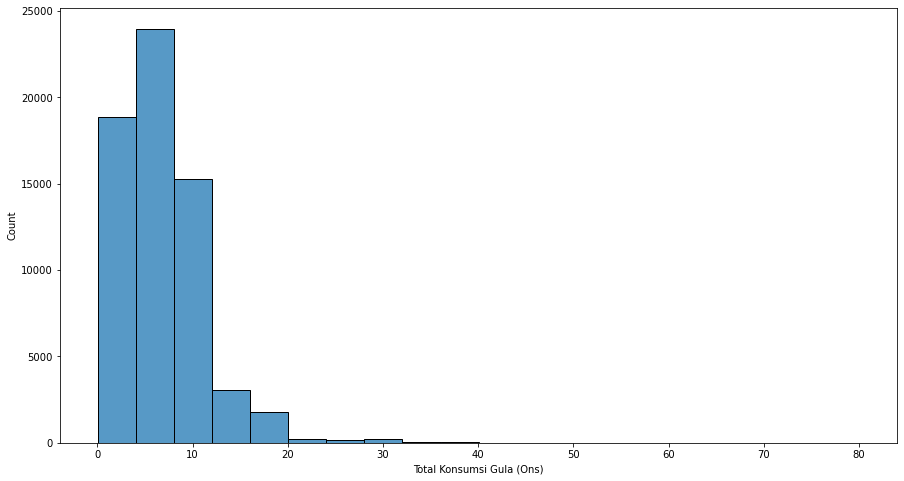

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(tabel_kotadesa['Total Konsumsi Gula (Ons)'], bins=20)

In [ ]:
tabel_kotadesa['Total Konsumsi Gula (Ons)']

0          15.0
27          5.0
49         10.0
76          5.0
118         2.5
           ... 
2747399    10.0
2747435     5.0
2747462     5.0
2747486     5.0
2747529    10.0
Name: Total Konsumsi Gula (Ons), Length: 63602, dtype: float64

In [ ]:
kuartil = pd.qcut(tabel_kotadesa['Total Konsumsi Gula (Ons)'], 20, duplicates='drop', retbins= False)

In [ ]:
kuartil

0          (11.0, 15.0]
27           (4.2, 5.0]
49          (7.7, 10.0]
76           (4.2, 5.0]
118          (2.0, 2.5]
               ...     
2747399     (7.7, 10.0]
2747435      (4.2, 5.0]
2747462      (4.2, 5.0]
2747486      (4.2, 5.0]
2747529     (7.7, 10.0]
Name: Total Konsumsi Gula (Ons), Length: 63602, dtype: category
Categories (12, interval[float64]): [(0.079, 1.0] < (1.0, 2.0] < (2.0, 2.5] < (2.5, 3.3] ... (7.7, 10.0] < (10.0, 11.0] < (11.0, 15.0] < (15.0, 80.0]]

In [ ]:
tabel_kotadesa['kuartil'] = kuartil
tabel_kotadesa['Multiply'] = tabel_kotadesa['Total Konsumsi Gula (Ons)']*tabel_kotadesa['Weighting']

tabel_kotadesa

,Urut,Total Konsumsi Gula (Ons),Pernah Berobat Jalan 6 Bulan Terakhir?,Weighting,Kota/Desa,kuartil,Multiply
0,2.750231e+07,15.0,Tidak,328.766850,Kota,"(11.0, 15.0]",4931.502750
27,3.000125e+07,5.0,Tidak,30.502945,Kota,"(4.2, 5.0]",152.514725
49,3.250134e+07,10.0,Tidak,65.848070,Kota,"(7.7, 10.0]",658.480700
76,3.500848e+07,5.0,Tidak,626.282040,Kota,"(4.2, 5.0]",3131.410200
118,3.502246e+07,2.5,Ya,1146.070900,Kota,"(2.0, 2.5]",2865.177250
...,...,...,...,...,...,...,...
2747399,2.364676e+11,10.0,Tidak,523.004640,Desa,"(7.7, 10.0]",5230.046400
2747435,2.365029e+11,5.0,Ya,267.552060,Desa,"(4.2, 5.0]",1337.760300
2747462,2.365501e+11,5.0,Tidak,212.682130,Desa,"(4.2, 5.0]",1063.410650
2747486,2.403726e+11,5.0,Tidak,593.981260,Desa,"(4.2, 5.0]",2969.906300


In [ ]:
tabel_kuartil = tabel_kotadesa.groupby(['kuartil', 'Pernah Berobat Jalan 6 Bulan Terakhir?']).sum()['Multiply']
tabel_kuartil

kuartil       Pernah Berobat Jalan 6 Bulan Terakhir?
(0.079, 1.0]  Tidak                                     2.324036e+06
              Ya                                        7.497227e+05
(1.0, 2.0]    Tidak                                     4.606756e+06
              Ya                                        1.739931e+06
(2.0, 2.5]    Tidak                                     1.365514e+07
              Ya                                        5.648353e+06
(2.5, 3.3]    Tidak                                     5.561130e+06
              Ya                                        1.856952e+06
(3.3, 4.2]    Tidak                                     9.233305e+06
              Ya                                        3.254309e+06
(4.2, 5.0]    Tidak                                     4.904183e+07
              Ya                                        1.615391e+07
(5.0, 7.0]    Tidak                                     1.774953e+07
              Ya                                  

In [ ]:
Quartil= []
persentase_berobat = []

for K in range(0,len(tabel_kuartil.index)):
    Quartil.append(str(tabel_kuartil.index[K][0])[1:-1])
    persentase_berobat.append(tabel_kuartil[tabel_kuartil.index[K][0]][1]/(tabel_kuartil[tabel_kuartil.index[K][0]][1] + tabel_kuartil[tabel_kuartil.index[K][0]][0]))



In [ ]:
Quartil = list(dict.fromkeys(Quartil))
persentase_berobat = list(dict.fromkeys(persentase_berobat))

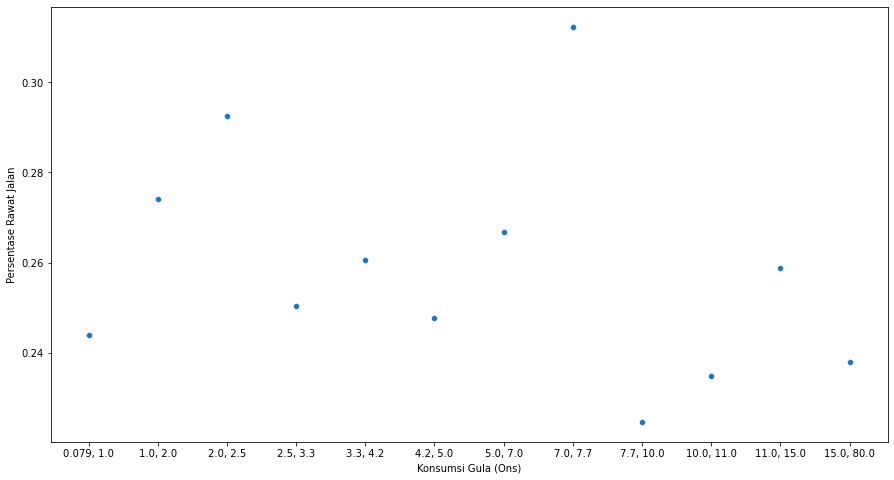

In [ ]:
plt.figure(figsize=[15,8])
sns.scatterplot(x = Quartil, y = persentase_berobat)
plt.xlabel('Konsumsi Gula (Ons)')
plt.ylabel('Persentase Rawat Jalan')
plt.show()

# Korelasi Jumlah Konsumsi Gula Per Jenis Dengan Rawat Jalan

### Gula Pasir

In [ ]:
tabel_pasir = gula_pasir.merge(sakit_6, how='left', on='urut')
tabel_pasir.drop(['weind_y'], axis=1, inplace=True)
tabel_pasir.rename(columns={'weind_x': 'weind'}, inplace=True)
tabel_pasir['b5r7'] = tabel_pasir['b5r7'].map({1: 'Ya', 2: 'Tidak'})
tabel_pasir

,urut,kode,b41k8,weind,multiply,b5r7
0,4.408589e+07,159,10.00,802.58200,8025.820000,Tidak
1,8.817178e+07,159,5.00,583.20260,2916.013000,Tidak
2,1.763436e+08,159,2.50,120.22718,300.567950,Tidak
3,2.204294e+08,159,10.00,1498.96610,14989.661000,Tidak
4,2.645153e+08,159,5.00,504.61030,2523.051500,Tidak
...,...,...,...,...,...,...
63699,1.169259e+11,159,10.00,10037.11100,100371.110000,Tidak
63700,1.669035e+10,159,2.50,4480.41260,11201.031500,Tidak
63701,3.338069e+10,159,5.00,5828.87350,29144.367500,Tidak
63702,1.001421e+11,159,5.00,4122.54500,20612.725000,Tidak


In [ ]:
kuartil_pasir = pd.qcut(tabel_pasir['b41k8'], 20, duplicates='drop', retbins= False)
tabel_pasir['kuartil'] = kuartil_pasir
tabel_kuartil_pasir = tabel_pasir.groupby(['kuartil', 'b5r7']).sum()['multiply']
tabel_kuartil_pasir

kuartil       b5r7 
(0.049, 1.0]  Tidak    9.161017e+06
              Ya       2.853532e+06
(1.0, 2.0]    Tidak    1.514159e+07
              Ya       5.203373e+06
(2.0, 2.5]    Tidak    6.230786e+07
              Ya       2.392925e+07
(2.5, 3.0]    Tidak    1.443498e+07
              Ya       4.657387e+06
(3.0, 4.0]    Tidak    2.549837e+07
              Ya       8.358069e+06
(4.0, 5.0]    Tidak    2.169619e+08
              Ya       7.215565e+07
(5.0, 5.7]    Tidak    6.981226e+06
              Ya       1.886472e+06
(5.7, 7.5]    Tidak    7.046093e+07
              Ya       2.650132e+07
(7.5, 9.0]    Tidak    4.009503e+07
              Ya       1.293022e+07
(9.0, 10.0]   Tidak    3.625178e+08
              Ya       1.080619e+08
(10.0, 15.0]  Tidak    9.995455e+07
              Ya       3.312127e+07
(15.0, 70.0]  Tidak    1.237522e+08
              Ya       4.002607e+07
Name: multiply, dtype: float64

In [ ]:
Quartil_pasir = []
persentase_berobat_pasir = []

for K in range(0,len(tabel_kuartil_pasir.index)):
    Quartil_pasir.append(str(tabel_kuartil_pasir.index[K][0])[1:-1])
    persentase_berobat_pasir.append(tabel_kuartil_pasir[tabel_kuartil_pasir.index[K][0]][1]/(tabel_kuartil_pasir[tabel_kuartil_pasir.index[K][0]][1] + tabel_kuartil_pasir[tabel_kuartil_pasir.index[K][0]][0]))

Quartil_pasir = list(dict.fromkeys(Quartil_pasir))
persentase_berobat_pasir = list(dict.fromkeys(persentase_berobat_pasir))

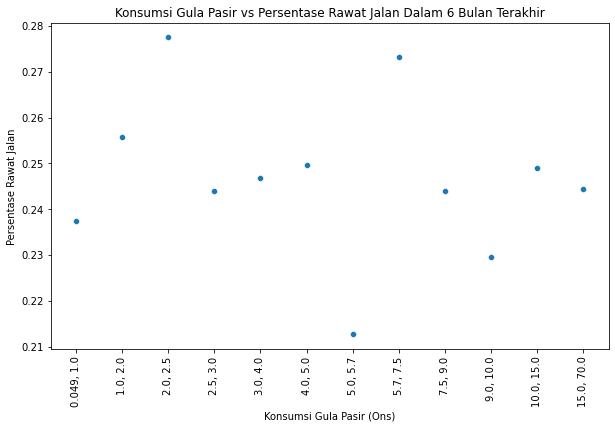

In [ ]:
plt.figure(figsize=[10,6])
sns.scatterplot(x = Quartil_pasir, y = persentase_berobat_pasir)
plt.xlabel('Konsumsi Gula Pasir (Ons)')
plt.ylabel('Persentase Rawat Jalan')
plt.xticks(rotation = 90)
plt.title('Konsumsi Gula Pasir vs Persentase Rawat Jalan Dalam 6 Bulan Terakhir')
plt.show()

### Gula Merah

In [ ]:
tabel_merah = gula_merah.merge(sakit_6, how='left', on='urut')
tabel_merah.drop(['weind_y'], axis=1, inplace=True)
tabel_merah.rename(columns={'weind_x': 'weind'}, inplace=True)
tabel_merah['b5r7'] = tabel_merah['b5r7'].map({1: 'Ya', 2: 'Tidak'})
tabel_merah

,urut,kode,b41k8,weind,multiply,b5r7
0,7.929912e+08,160,5.00,1631.19800,8155.99000,Tidak
1,5.292688e+08,160,10.00,1526.50870,15265.08700,Tidak
2,4.400458e+08,160,1.00,1001.39557,1001.39557,Tidak
3,1.650991e+08,160,1.00,823.56995,823.56995,Tidak
4,2.201321e+08,160,5.00,2288.79130,11443.95650,Tidak
...,...,...,...,...,...,...
9426,1.904983e+10,160,5.00,4162.71400,20813.57000,Ya
9427,2.369160e+10,160,2.00,1964.05430,3928.10860,Tidak
9428,1.975264e+10,160,5.00,1512.66160,7563.30800,Tidak
9429,2.106655e+10,160,2.44,511.53525,1248.14601,Ya


In [ ]:
kuartil_merah = pd.qcut(tabel_merah['b41k8'], 20, duplicates='drop', retbins= False)
tabel_merah['kuartil'] = kuartil_merah
tabel_kuartil_merah = tabel_merah.groupby(['kuartil', 'b5r7']).sum()['multiply']
tabel_kuartil_merah

kuartil                      b5r7 
(0.028999999999999998, 0.5]  Tidak    1.323626e+06
                             Ya       5.847835e+05
(0.5, 0.85]                  Tidak    1.181905e+06
                             Ya       5.135242e+05
(0.85, 1.0]                  Tidak    8.025263e+06
                             Ya       2.829836e+06
(1.0, 1.5]                   Tidak    3.620405e+06
                             Ya       1.656757e+06
(1.5, 1.89]                  Tidak    7.105989e+05
                             Ya       6.182455e+05
(1.89, 2.0]                  Tidak    1.019716e+07
                             Ya       3.893331e+06
(2.0, 2.5]                   Tidak    1.967728e+07
                             Ya       9.154989e+06
(2.5, 3.465]                 Tidak    4.025359e+06
                             Ya       1.816269e+06
(3.465, 5.0]                 Tidak    1.630816e+07
                             Ya       6.164848e+06
(5.0, 40.0]                  Tidak    1.484261e

In [ ]:
Quartil_merah= []
persentase_berobat_merah = []

for K in range(0,len(tabel_kuartil_merah.index)):
    Quartil_merah.append(str(tabel_kuartil_merah.index[K][0])[1:-1])
    persentase_berobat_merah.append(tabel_kuartil_merah[tabel_kuartil_merah.index[K][0]][1]/(tabel_kuartil_merah[tabel_kuartil_merah.index[K][0]][1] + tabel_kuartil_merah[tabel_kuartil_merah.index[K][0]][0]))

Quartil_merah = list(dict.fromkeys(Quartil_merah))
persentase_berobat_merah = list(dict.fromkeys(persentase_berobat_merah))

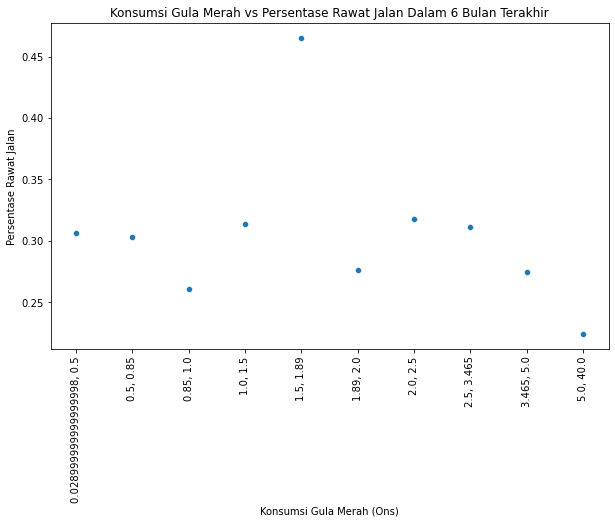

In [ ]:
plt.figure(figsize=[10,6])
sns.scatterplot(x = Quartil_merah, y = persentase_berobat_merah)
plt.xlabel('Konsumsi Gula Merah (Ons)')
plt.ylabel('Persentase Rawat Jalan')
plt.xticks(rotation = 90)
plt.title('Konsumsi Gula Merah vs Persentase Rawat Jalan Dalam 6 Bulan Terakhir')
plt.show()

# KONSUMSI MINYAK

Konsumsi Minyak kelapa/Liter [152]

In [ ]:
minyak_kelapa = data[data['kode'] == 152]

minyak_kelapa = minyak_kelapa.loc[:, ['urut', 'kode', 'b41k8']]

Konsumsi Minyak Jagung/Liter [153]

In [ ]:
minyak_jagung = data[data['kode'] == 153]

minyak_jagung = minyak_jagung.loc[:, ['urut', 'kode', 'b41k8']]

Konsumsi Minyak Goreng Lainnya/Liter [154]

In [ ]:
minyak_lain = data[data['kode'] == 154]

minyak_lain = minyak_lain.loc[:, ['urut', 'kode', 'b41k8']]

In [ ]:
minyaque = pd.concat([minyak_kelapa, minyak_jagung, minyak_lain])
minyaque.drop(['kode'], axis=1, inplace=True)
minyaque = minyaque.groupby('urut').sum()
minyaque.reset_index(inplace=True)
minyaque.head()

,urut,b41k8
0,27502310.0,1.00
1,30001248.0,1.12
2,32501339.0,0.50
3,35008484.0,1.00
4,35022456.0,2.00


In [ ]:
sakit_6 = data_kor.loc[:, ['urut', 'b5r7','weind']]
sakit_6.drop_duplicates(subset=['urut'], inplace=True)
sakit_6

,urut,b5r7,weind
0,2.750231e+07,2,328.766850
8,3.000125e+07,2,30.502945
12,3.250134e+07,2,65.848070
14,3.500848e+07,2,626.282040
19,3.502246e+07,1,1146.070900
...,...,...,...
274034,2.364676e+11,2,523.004640
274040,2.365029e+11,1,267.552060
274042,2.365501e+11,2,212.682130
274044,2.403726e+11,2,593.981260


In [ ]:
tabel_akhir = minyaque.merge(sakit_6, how='left', on='urut')
tabel_akhir['b5r7'] = tabel_akhir['b5r7'].map({1:'Ya',2:'Tidak'})
tabel_akhir.rename(columns={ 'urut': 'Urut', 'b41k8': 'Total Konsumsi Minyak (liter)', 'b5r7': 'Pernah Berobat Jalan 6 Bulan Terakhir?', 'weind':'Weighting'}, inplace=True)
tabel_akhir.drop_duplicates(subset=['Urut'], inplace=True)
tabel_akhir

,Urut,Total Konsumsi Minyak (liter),Pernah Berobat Jalan 6 Bulan Terakhir?,Weighting
0,2.750231e+07,1.00,Tidak,328.766850
1,3.000125e+07,1.12,Tidak,30.502945
2,3.250134e+07,0.50,Tidak,65.848070
3,3.500848e+07,1.00,Tidak,626.282040
4,3.502246e+07,2.00,Ya,1146.070900
...,...,...,...,...
65063,2.364676e+11,2.00,Tidak,523.004640
65064,2.365029e+11,0.62,Ya,267.552060
65065,2.365501e+11,0.31,Tidak,212.682130
65066,2.403726e+11,1.00,Tidak,593.981260


# Jenis minyak apa yang paling banyak dikonsumsi

In [ ]:
minyak_kelapa = data[data['kode'] == 152]

minyak_kelapa = minyak_kelapa.loc[:, ['urut', 'kode', 'b41k8', 'weind']]

minyak_kelapa['multiply'] = minyak_kelapa['b41k8']*minyak_kelapa['weind']

minyak_kelapa['multiply'].sum()

27953486.70909374

In [ ]:
minyak_jagung = data[data['kode'] == 153]

minyak_jagung = minyak_jagung.loc[:, ['urut', 'kode', 'b41k8', 'weind']]

minyak_jagung['multiply'] = minyak_jagung['b41k8']*minyak_jagung['weind']

minyak_jagung['multiply'].sum()

927229.28116737

In [ ]:
minyak_lain = data[data['kode'] == 154]

minyak_lain = minyak_lain.loc[:, ['urut', 'kode', 'b41k8', 'weind']]

minyak_lain['multiply'] = minyak_lain['b41k8']*minyak_lain['weind']

minyak_lain['multiply'].sum()

183108610.61106917

In [ ]:
data2 = {'Jenis Minyak': ['Minyak Kelapa', 'Minyak Jagung', 'Minyak Lainnya'], 
        'Jumlah Konsumsi (liter)': [minyak_kelapa['multiply'].sum(), minyak_jagung['multiply'].sum(),minyak_lain['multiply'].sum()]
        }

In [ ]:
total_konsumsi_jenis = pd.DataFrame(data2)

In [ ]:
total_konsumsi_jenis

,Jenis Minyak,Jumlah Konsumsi (liter)
0,Minyak Kelapa,2.795349e+07
1,Minyak Jagung,9.272293e+05
2,Minyak Lainnya,1.831086e+08


<AxesSubplot:xlabel='Jenis Minyak', ylabel='Jumlah Konsumsi (liter)'>

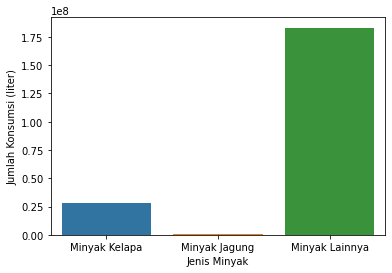

In [ ]:
sns.barplot(x = total_konsumsi_jenis['Jenis Minyak'], y= total_konsumsi_jenis['Jumlah Konsumsi (liter)'])

# Konsumsi minyak perkotaan/pedesaan

In [ ]:
kotadesa = data[['urut', 'b1r5']]
kotadesa

,urut,b1r5
0,4.408589e+07,2
1,4.408589e+07,2
2,4.408589e+07,2
3,4.408589e+07,2
4,4.408589e+07,2
...,...,...
2899084,1.669035e+11,1
2899085,1.669035e+11,1
2899086,1.669035e+11,1
2899087,1.669035e+11,1


In [ ]:
tabel_kotadesa = tabel_akhir.rename(columns={'Urut':'urut'})

In [ ]:
tabel_kotadesa = tabel_kotadesa.merge(kotadesa, how='left', on='urut')

In [ ]:
tabel_kotadesa.rename(columns={'b1r5': 'Kota/Desa', 'urut':'Urut'}, inplace=True)
tabel_kotadesa['Kota/Desa'] = tabel_kotadesa['Kota/Desa'].map({1:'Kota', 2:'Desa'})
tabel_kotadesa.drop_duplicates(subset=['Urut'], inplace=True)
tabel_kotadesa

,Urut,Total Konsumsi Minyak (liter),Pernah Berobat Jalan 6 Bulan Terakhir?,Weighting,Kota/Desa
0,2.750231e+07,1.00,Tidak,328.766850,Kota
27,3.000125e+07,1.12,Tidak,30.502945,Kota
49,3.250134e+07,0.50,Tidak,65.848070,Kota
76,3.500848e+07,1.00,Tidak,626.282040,Kota
118,3.502246e+07,2.00,Ya,1146.070900,Kota
...,...,...,...,...,...
2807361,2.364676e+11,2.00,Tidak,523.004640,Desa
2807397,2.365029e+11,0.62,Ya,267.552060,Desa
2807424,2.365501e+11,0.31,Tidak,212.682130,Desa
2807448,2.403726e+11,1.00,Tidak,593.981260,Desa


In [ ]:
summary_konsumsi_kotadesa = tabel_kotadesa.groupby(['Kota/Desa']).mean()['Total Konsumsi Minyak (liter)']

Text(0, 0.5, 'Liter')

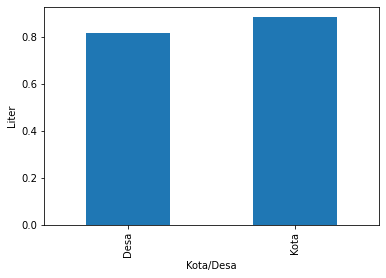

In [ ]:
summary_konsumsi_kotadesa.plot.bar()
plt.ylabel('Liter')

# Distribusi berobat jalan kota/desa

In [ ]:
tabel_kotadesa

,Urut,Total Konsumsi Minyak (liter),Pernah Berobat Jalan 6 Bulan Terakhir?,Weighting,Kota/Desa
0,2.750231e+07,1.00,Tidak,328.766850,Kota
27,3.000125e+07,1.12,Tidak,30.502945,Kota
49,3.250134e+07,0.50,Tidak,65.848070,Kota
76,3.500848e+07,1.00,Tidak,626.282040,Kota
118,3.502246e+07,2.00,Ya,1146.070900,Kota
...,...,...,...,...,...
2807361,2.364676e+11,2.00,Tidak,523.004640,Desa
2807397,2.365029e+11,0.62,Ya,267.552060,Desa
2807424,2.365501e+11,0.31,Tidak,212.682130,Desa
2807448,2.403726e+11,1.00,Tidak,593.981260,Desa


In [ ]:
persentase_berobat_kotadesa = tabel_kotadesa.groupby(['Kota/Desa', 'Pernah Berobat Jalan 6 Bulan Terakhir?']).sum()['Weighting']
persentase_berobat_kotadesa

Kota/Desa  Pernah Berobat Jalan 6 Bulan Terakhir?
Desa       Tidak                                     2.237007e+07
           Ya                                        7.434030e+06
Kota       Tidak                                     2.078987e+07
           Ya                                        7.484022e+06
Name: Weighting, dtype: float64

Text(0, 0.5, 'Jumlah Penduduk (10 Juta)')

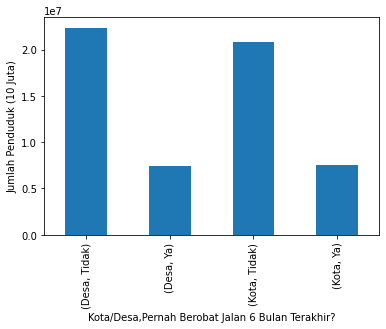

In [ ]:
persentase_berobat_kotadesa.plot.bar()
plt.ylabel('Jumlah Penduduk (10 Juta)')

<AxesSubplot:xlabel='Lokasi', ylabel='Persentase'>

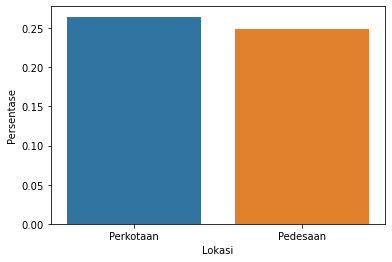

In [ ]:
persentase_berobat_desa = persentase_berobat_kotadesa['Desa']['Ya']/(persentase_berobat_kotadesa['Desa']['Ya']+persentase_berobat_kotadesa['Desa']['Tidak'])
persentase_berobat_kota = persentase_berobat_kotadesa['Kota']['Ya']/(persentase_berobat_kotadesa['Kota']['Ya']+persentase_berobat_kotadesa['Kota']['Tidak'])

persentase_berobat = pd.DataFrame({
    'Lokasi': ['Perkotaan', 'Pedesaan'],
    'Persentase': [persentase_berobat_kota, persentase_berobat_desa]
})

sns.barplot(x= persentase_berobat['Lokasi'], y= persentase_berobat['Persentase'])

# Korelasi Konsumsi Minyak dengan Berobat Jalan

In [ ]:
tabel_kotadesa.describe()

,Urut,Total Konsumsi Minyak (liter),Weighting
count,6.506800e+04,65068.000000,65068.000000
mean,1.358819e+10,0.845938,892.573785
std,2.195888e+10,0.499894,842.095610
min,2.750231e+07,0.020000,1.000000
25%,1.890417e+09,0.500000,328.938040
50%,5.406576e+09,0.800000,597.823550
75%,1.515576e+10,1.000000,1179.998700
max,2.670807e+11,11.200000,8614.077000


<AxesSubplot:xlabel='Total Konsumsi Minyak (liter)', ylabel='Count'>

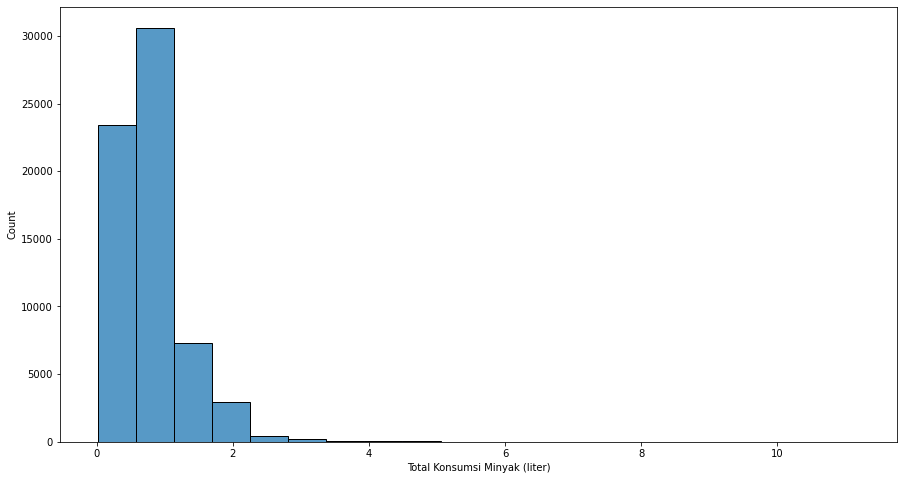

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(tabel_kotadesa['Total Konsumsi Minyak (liter)'], bins=20)

In [ ]:
tabel_kotadesa['Total Konsumsi Minyak (liter)']

0          1.00
27         1.12
49         0.50
76         1.00
118        2.00
           ... 
2807361    2.00
2807397    0.62
2807424    0.31
2807448    1.00
2807491    0.50
Name: Total Konsumsi Minyak (liter), Length: 65068, dtype: float64

In [ ]:
kuartil = pd.qcut(tabel_kotadesa['Total Konsumsi Minyak (liter)'], 20, duplicates='drop', retbins= False)

In [ ]:
kuartil

0            (0.8, 1.0]
27           (1.0, 1.2]
49          (0.45, 0.5]
76           (0.8, 1.0]
118        (1.83, 11.2]
               ...     
2807361    (1.83, 11.2]
2807397     (0.6, 0.71]
2807424     (0.3, 0.45]
2807448      (0.8, 1.0]
2807491     (0.45, 0.5]
Name: Total Konsumsi Minyak (liter), Length: 65068, dtype: category
Categories (13, interval[float64]): [(0.019, 0.25] < (0.25, 0.3] < (0.3, 0.45] < (0.45, 0.5] ... (1.0, 1.2] < (1.2, 1.4] < (1.4, 1.83] < (1.83, 11.2]]

In [ ]:
tabel_kotadesa['kuartil'] = kuartil
tabel_kotadesa['Multiply'] = tabel_kotadesa['Total Konsumsi Minyak (liter)']*tabel_kotadesa['Weighting']

tabel_kotadesa

,Urut,Total Konsumsi Minyak (liter),Pernah Berobat Jalan 6 Bulan Terakhir?,Weighting,Kota/Desa,kuartil,Multiply
0,2.750231e+07,1.00,Tidak,328.766850,Kota,"(0.8, 1.0]",328.766850
27,3.000125e+07,1.12,Tidak,30.502945,Kota,"(1.0, 1.2]",34.163298
49,3.250134e+07,0.50,Tidak,65.848070,Kota,"(0.45, 0.5]",32.924035
76,3.500848e+07,1.00,Tidak,626.282040,Kota,"(0.8, 1.0]",626.282040
118,3.502246e+07,2.00,Ya,1146.070900,Kota,"(1.83, 11.2]",2292.141800
...,...,...,...,...,...,...,...
2807361,2.364676e+11,2.00,Tidak,523.004640,Desa,"(1.83, 11.2]",1046.009280
2807397,2.365029e+11,0.62,Ya,267.552060,Desa,"(0.6, 0.71]",165.882277
2807424,2.365501e+11,0.31,Tidak,212.682130,Desa,"(0.3, 0.45]",65.931460
2807448,2.403726e+11,1.00,Tidak,593.981260,Desa,"(0.8, 1.0]",593.981260


In [ ]:
tabel_kuartil = tabel_kotadesa.groupby(['kuartil', 'Pernah Berobat Jalan 6 Bulan Terakhir?']).sum()['Multiply']
tabel_kuartil

kuartil        Pernah Berobat Jalan 6 Bulan Terakhir?
(0.019, 0.25]  Tidak                                     7.874346e+05
               Ya                                        3.149528e+05
(0.25, 0.3]    Tidak                                     2.623513e+05
               Ya                                        1.149485e+05
(0.3, 0.45]    Tidak                                     6.878437e+05
               Ya                                        2.653095e+05
(0.45, 0.5]    Tidak                                     4.532125e+06
               Ya                                        1.499200e+06
(0.5, 0.53]    Tidak                                     5.384611e+04
               Ya                                        1.756477e+04
(0.53, 0.6]    Tidak                                     1.189389e+06
               Ya                                        4.666814e+05
(0.6, 0.71]    Tidak                                     1.249107e+06
               Ya                   

In [ ]:
Quartil= []
persentase_berobat = []

for K in range(0,len(tabel_kuartil.index)):
    Quartil.append(str(tabel_kuartil.index[K][0])[1:-1])
    persentase_berobat.append(tabel_kuartil[tabel_kuartil.index[K][0]][1]/(tabel_kuartil[tabel_kuartil.index[K][0]][1] + tabel_kuartil[tabel_kuartil.index[K][0]][0]))


In [ ]:
Quartil = list(dict.fromkeys(Quartil))
persentase_berobat = list(dict.fromkeys(persentase_berobat))

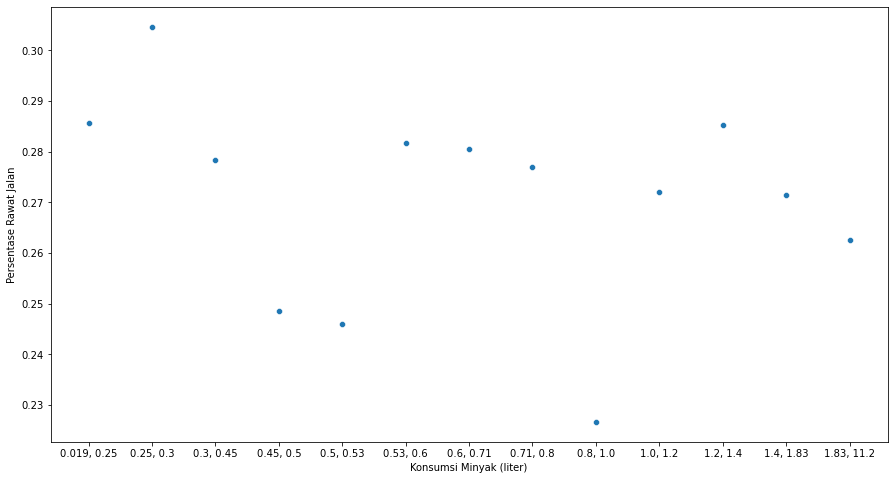

In [ ]:
plt.figure(figsize=[15,8])
sns.scatterplot(x = Quartil, y = persentase_berobat)
plt.xlabel('Konsumsi Minyak (liter)')
plt.ylabel('Persentase Rawat Jalan')
plt.show()

# Korelasi Jumlah Konsumsi Minyak Per Jenis Dengan Rawat Jalan

### Minyak Kelapa

In [ ]:
tabel_kelapa = minyak_kelapa.merge(sakit_6, how='left', on='urut')
tabel_kelapa.drop(['weind_y'], axis=1, inplace=True)
tabel_kelapa.rename(columns={'weind_x': 'weind'}, inplace=True)
tabel_kelapa['b5r7'] = tabel_kelapa['b5r7'].map({1: 'Ya', 2: 'Tidak'})
tabel_kelapa

,urut,kode,b41k8,weind,multiply,b5r7
0,4.401331e+07,152,0.50,956.882750,478.441375,Tidak
1,8.802662e+07,152,1.00,120.211975,120.211975,Tidak
2,1.320399e+08,152,1.00,766.422800,766.422800,Tidak
3,1.760532e+08,152,1.00,115.236570,115.236570,Tidak
4,2.200666e+08,152,0.50,985.166140,492.583070,Tidak
...,...,...,...,...,...,...
11834,5.008513e+10,152,1.00,653.155200,653.155200,Tidak
11835,1.168653e+11,152,1.00,3029.209000,3029.209000,Tidak
11836,1.502554e+11,152,0.50,945.510800,472.755400,Tidak
11837,1.670369e+10,152,1.00,6911.852500,6911.852500,Tidak


In [ ]:
kuartil_kelapa= pd.qcut(tabel_kelapa['b41k8'], 20, duplicates='drop', retbins= False)
tabel_kelapa['kuartil'] = kuartil_kelapa
tabel_kuartil_kelapa = tabel_kelapa.groupby(['kuartil', 'b5r7']).sum()['multiply']
tabel_kuartil_kelapa

kuartil        b5r7 
(0.019, 0.25]  Tidak    3.184834e+05
               Ya       9.175572e+04
(0.25, 0.3]    Tidak    1.304353e+05
               Ya       3.652949e+04
(0.3, 0.4]     Tidak    3.039222e+05
               Ya       8.782442e+04
(0.4, 0.5]     Tidak    2.324367e+06
               Ya       5.740674e+05
(0.5, 0.52]    Tidak    2.986938e+04
               Ya       7.439936e+03
(0.52, 0.6]    Tidak    5.514703e+05
               Ya       1.653622e+05
(0.6, 0.63]    Tidak    4.907525e+05
               Ya       1.649002e+05
(0.63, 0.75]   Tidak    1.194715e+06
               Ya       3.917057e+05
(0.75, 0.8]    Tidak    5.743483e+05
               Ya       2.101414e+05
(0.8, 1.0]     Tidak    8.319258e+06
               Ya       1.892094e+06
(1.0, 1.08]    Tidak    9.408557e+04
               Ya       3.807615e+04
(1.08, 1.25]   Tidak    1.696518e+06
               Ya       6.446062e+05
(1.25, 1.6]    Tidak    1.917767e+06
               Ya       6.714157e+05
(1.6, 6.0]     Ti

In [ ]:
Quartil_kelapa= []
persentase_berobat_kelapa = []

for K in range(0,len(tabel_kuartil_kelapa.index)):
    Quartil_kelapa.append(str(tabel_kuartil_kelapa.index[K][0])[1:-1])
    persentase_berobat_kelapa.append(tabel_kuartil_kelapa[tabel_kuartil_kelapa.index[K][0]][1]/(tabel_kuartil_kelapa[tabel_kuartil_kelapa.index[K][0]][1] + tabel_kuartil_kelapa[tabel_kuartil_kelapa.index[K][0]][0]))

Quartil_kelapa = list(dict.fromkeys(Quartil_kelapa))
persentase_berobat_kelapa = list(dict.fromkeys(persentase_berobat_kelapa))

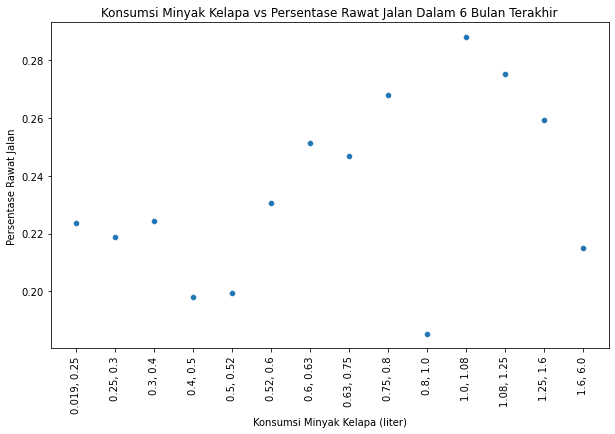

In [ ]:
plt.figure(figsize=[10,6])
sns.scatterplot(x = Quartil_kelapa, y = persentase_berobat_kelapa)
plt.xlabel('Konsumsi Minyak Kelapa (liter)')
plt.ylabel('Persentase Rawat Jalan')
plt.xticks(rotation = 90)
plt.title('Konsumsi Minyak Kelapa vs Persentase Rawat Jalan Dalam 6 Bulan Terakhir')
plt.show()

### Minyak Jagung

In [ ]:
tabel_jagung = minyak_jagung.merge(sakit_6, how='left', on='urut')
tabel_jagung.drop(['weind_y'], axis=1, inplace=True)
tabel_jagung.rename(columns={'weind_x': 'weind'}, inplace=True)
tabel_jagung['b5r7'] = tabel_jagung['b5r7'].map({1: 'Ya', 2: 'Tidak'})
tabel_jagung

,urut,kode,b41k8,weind,multiply,b5r7
0,4.405282e+08,153,1.0,1442.20390,1442.203900,Ya
1,1.061071e+09,153,1.0,3391.73000,3391.730000,Tidak
2,6.618820e+08,153,1.0,1754.09100,1754.091000,Ya
3,1.323764e+09,153,1.0,2512.07980,2512.079800,Tidak
4,7.054798e+08,153,0.6,738.86206,443.317236,Tidak
...,...,...,...,...,...,...
304,9.031697e+09,153,0.7,3510.18650,2457.130550,Tidak
305,2.257445e+10,153,1.0,839.45660,839.456600,Tidak
306,7.933510e+10,153,1.0,67.10514,67.105140,Tidak
307,3.849780e+10,153,0.3,1182.20520,354.661560,Ya


In [ ]:
kuartil_jagung= pd.qcut(tabel_jagung['b41k8'], 20, duplicates='drop', retbins= False)
tabel_jagung['kuartil'] = kuartil_jagung
tabel_kuartil_jagung = tabel_jagung.groupby(['kuartil', 'b5r7']).sum()['multiply']
tabel_kuartil_jagung

kuartil         b5r7 
(0.099, 0.25]   Tidak      8141.730167
                Ya         6241.353735
(0.25, 0.3]     Tidak      1800.321453
                Ya         5759.302641
(0.3, 0.458]    Tidak     13513.601955
                Ya         4486.680052
(0.458, 0.5]    Tidak     54905.137715
                Ya        22431.721382
(0.5, 0.6]      Tidak     18926.847681
                Ya        14557.022316
(0.6, 0.7]      Tidak     16123.905152
                Ya        12767.691696
(0.7, 0.8]      Tidak     38467.033570
                Ya        10485.602805
(0.8, 1.0]      Tidak    200334.372425
                Ya        83967.163390
(1.0, 1.2]      Tidak     49031.402628
                Ya        13199.368360
(1.2, 1.448]    Tidak     24012.981750
                Ya         4854.497329
(1.448, 1.552]  Tidak     79198.456367
                Ya         3387.244971
(1.552, 2.0]    Tidak    128569.481353
                Ya        56778.386198
(2.0, 5.5]      Tidak     53045.839327
   

In [ ]:
Quartil_jagung= []
persentase_berobat_jagung = []

for K in range(0,len(tabel_kuartil_jagung.index)):
    Quartil_jagung.append(str(tabel_kuartil_jagung.index[K][0])[1:-1])
    persentase_berobat_jagung.append(tabel_kuartil_jagung[tabel_kuartil_jagung.index[K][0]][1]/(tabel_kuartil_jagung[tabel_kuartil_jagung.index[K][0]][1] + tabel_kuartil_jagung[tabel_kuartil_jagung.index[K][0]][0]))

Quartil_jagung = list(dict.fromkeys(Quartil_jagung))
persentase_berobat_jagung = list(dict.fromkeys(persentase_berobat_jagung))

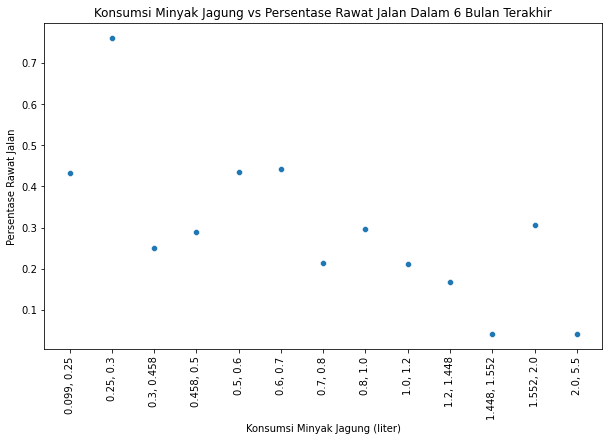

In [ ]:
plt.figure(figsize=[10,6])
sns.scatterplot(x = Quartil_jagung, y = persentase_berobat_jagung)
plt.xlabel('Konsumsi Minyak Jagung (liter)')
plt.ylabel('Persentase Rawat Jalan')
plt.xticks(rotation = 90)
plt.title('Konsumsi Minyak Jagung vs Persentase Rawat Jalan Dalam 6 Bulan Terakhir')
plt.show()

### Minyak Lain

In [ ]:
tabel_lain = minyak_lain.merge(sakit_6, how='left', on='urut')
tabel_lain.drop(['weind_y'], axis=1, inplace=True)
tabel_lain.rename(columns={'weind_x': 'weind'}, inplace=True)
tabel_lain['b5r7'] = tabel_lain['b5r7'].map({1: 'Ya', 2: 'Tidak'})
tabel_lain

,urut,kode,b41k8,weind,multiply,b5r7
0,4.408589e+07,154,0.60,802.58200,481.549200,Tidak
1,8.817178e+07,154,1.00,583.20260,583.202600,Tidak
2,1.322577e+08,154,0.25,133.75847,33.439617,Tidak
3,1.763436e+08,154,0.50,120.22718,60.113590,Tidak
4,2.204294e+08,154,1.20,1498.96610,1798.759320,Tidak
...,...,...,...,...,...,...
54398,8.345173e+10,154,0.06,1272.24670,76.334802,Tidak
54399,1.001421e+11,154,0.50,4122.54500,2061.272500,Tidak
54400,1.168324e+11,154,0.75,2568.02600,1926.019500,Tidak
54401,1.502131e+11,154,0.25,1497.86550,374.466375,Tidak


In [ ]:
kuartil_lain= pd.qcut(tabel_lain['b41k8'], 20, duplicates='drop', retbins= False)
tabel_lain['kuartil'] = kuartil_lain
tabel_kuartil_lain = tabel_lain.groupby(['kuartil', 'b5r7']).sum()['multiply']
tabel_kuartil_lain

kuartil        b5r7 
(0.019, 0.25]  Tidak    2.105345e+06
               Ya       7.888242e+05
(0.25, 0.3]    Tidak    7.572184e+05
               Ya       3.064993e+05
(0.3, 0.45]    Tidak    2.016179e+06
               Ya       7.438302e+05
(0.45, 0.5]    Tidak    1.451461e+07
               Ya       4.731171e+06
(0.5, 0.6]     Tidak    4.244428e+06
               Ya       1.634957e+06
(0.6, 0.7]     Tidak    4.027024e+06
               Ya       1.539964e+06
(0.7, 0.8]     Tidak    8.489289e+06
               Ya       3.320498e+06
(0.8, 1.0]     Tidak    5.084772e+07
               Ya       1.539505e+07
(1.0, 1.2]     Tidak    9.222680e+06
               Ya       3.398828e+06
(1.2, 1.25]    Tidak    5.683706e+06
               Ya       2.225652e+06
(1.25, 1.7]    Tidak    1.319256e+07
               Ya       5.018749e+06
(1.7, 11.2]    Tidak    2.045558e+07
               Ya       8.448244e+06
Name: multiply, dtype: float64

In [ ]:
Quartil_lain= []
persentase_berobat_lain = []

for K in range(0,len(tabel_kuartil_lain.index)):
    Quartil_lain.append(str(tabel_kuartil_lain.index[K][0])[1:-1])
    persentase_berobat_lain.append(tabel_kuartil_lain[tabel_kuartil_lain.index[K][0]][1]/(tabel_kuartil_lain[tabel_kuartil_lain.index[K][0]][1] + tabel_kuartil_lain[tabel_kuartil_lain.index[K][0]][0]))

Quartil_lain = list(dict.fromkeys(Quartil_lain))
persentase_berobat_lain = list(dict.fromkeys(persentase_berobat_lain))

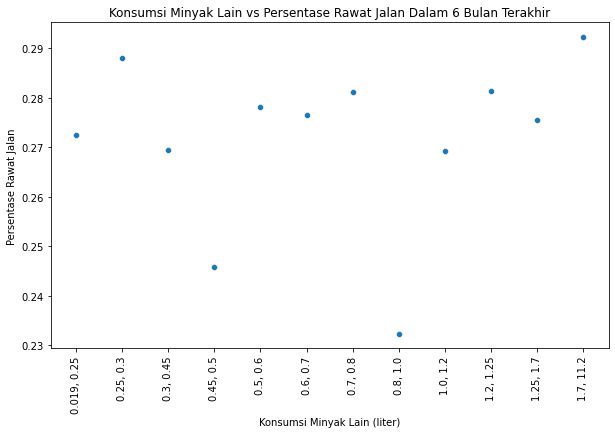

In [ ]:
plt.figure(figsize=[10,6])
sns.scatterplot(x = Quartil_lain, y = persentase_berobat_lain)
plt.xlabel('Konsumsi Minyak Lain (liter)')
plt.ylabel('Persentase Rawat Jalan')
plt.xticks(rotation = 90)
plt.title('Konsumsi Minyak Lain vs Persentase Rawat Jalan Dalam 6 Bulan Terakhir')
plt.show()

# KONSUMSI MIE

In [ ]:
mie_instan = data[data['kode'] == 206]

mie_instan = mie_instan.loc[:, ['urut', 'kode', 'b41k8']]

In [ ]:
mie_bakso = data[data['kode'] == 205]

mie_bakso = mie_bakso.loc[:, ['urut', 'kode', 'b41k8']]

In [ ]:
miequ = pd.concat([mie_instan, mie_instan])
miequ.drop(['kode'], axis=1, inplace=True)
miequ = miequ.groupby('urut').sum()
miequ.reset_index(inplace=True)
miequ.head()

,urut,b41k8
0,44013310.0,2.0
1,60096150.0,4.0
2,64108960.0,4.0
3,80086592.0,2.0
4,80201824.0,8.0


In [ ]:
sakit_6 = data_kor.loc[:, ['urut', 'b5r7','weind']]
sakit_6.drop_duplicates(subset=['urut'], inplace=True)
sakit_6

,urut,b5r7,weind
0,2.750231e+07,2,328.766850
8,3.000125e+07,2,30.502945
12,3.250134e+07,2,65.848070
14,3.500848e+07,2,626.282040
19,3.502246e+07,1,1146.070900
...,...,...,...
274034,2.364676e+11,2,523.004640
274040,2.365029e+11,1,267.552060
274042,2.365501e+11,2,212.682130
274044,2.403726e+11,2,593.981260


In [ ]:
tabel_merge_miequ_sakit = miequ.merge(sakit_6, how='left', on='urut')
tabel_merge_miequ_sakit['b5r7'] = tabel_merge_miequ_sakit['b5r7'].map({1:'Ya',2:'Tidak'})
tabel_merge_miequ_sakit.rename(columns={ 'urut': 'Urut', 'b41k8': 'Total Konsumsi Mie (Porsi)', 'b5r7': 'Pernah Berobat Jalan 6 Bulan Terakhir?', 'weind':'Weighting'}, inplace=True)
tabel_merge_miequ_sakit.drop_duplicates(subset=['Urut'], inplace=True)
tabel_merge_miequ_sakit

,Urut,Total Konsumsi Mie (Porsi),Pernah Berobat Jalan 6 Bulan Terakhir?,Weighting
0,4.401331e+07,2.0,Tidak,191.37656
1,6.009615e+07,4.0,Tidak,189.35805
2,6.410896e+07,4.0,Tidak,479.29642
3,8.008659e+07,2.0,Tidak,3332.32100
4,8.020182e+07,8.0,Tidak,6566.43700
...,...,...,...,...
2187,1.472519e+11,4.0,Tidak,405.47833
2188,1.582783e+11,8.0,Tidak,682.96880
2189,1.610523e+11,4.0,Tidak,628.57110
2190,1.669771e+11,6.0,Tidak,256.22934


# Jenis mie apa yang paling banyak dikonsumsi

In [ ]:
mie_instan = data[data['kode'] == 206]

mie_instan = mie_instan.loc[:, ['urut', 'kode', 'b41k8', 'weind']]

mie_instan['multiply'] = mie_instan['b41k8']*mie_instan['weind']

mie_instan['multiply'].sum()

25832343.616317697

In [ ]:
mie_bakso = data[data['kode'] == 205]

mie_bakso = mie_bakso.loc[:, ['urut', 'kode', 'b41k8', 'weind']]

mie_bakso['multiply'] = mie_bakso['b41k8']*mie_bakso['weind']

mie_bakso['multiply'].sum()

377906871.8601186

In [ ]:
data_konsumsi_mie = {'Jenis Mie': ['Mie Instan', 'Mie Bakso'], 
        'Jumlah Konsumsi Mie (Porsi)': [mie_instan['multiply'].sum(),mie_bakso['multiply'].sum()]
        }

In [ ]:
total_konsumsi_jenis_mie = pd.DataFrame(data_konsumsi_mie)

In [ ]:
total_konsumsi_jenis_mie

,Jenis Mie,Jumlah Konsumsi Mie (Porsi)
0,Mie Instan,2.583234e+07
1,Mie Bakso,3.779069e+08


<AxesSubplot:xlabel='Jenis Mie', ylabel='Jumlah Konsumsi Mie (Porsi)'>

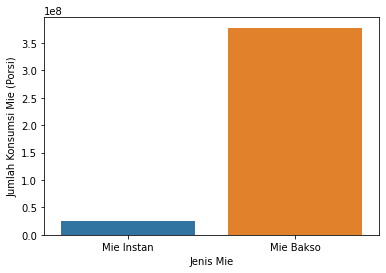

In [ ]:
sns.barplot(x = total_konsumsi_jenis_mie['Jenis Mie'], y= total_konsumsi_jenis_mie['Jumlah Konsumsi Mie (Porsi)'])

# Konsumsi Mie perkotaan/pedesaan

In [ ]:
kotadesa = data[['urut', 'b1r5']]
kotadesa

,urut,b1r5
0,4.408589e+07,2
1,4.408589e+07,2
2,4.408589e+07,2
3,4.408589e+07,2
4,4.408589e+07,2
...,...,...
2899084,1.669035e+11,1
2899085,1.669035e+11,1
2899086,1.669035e+11,1
2899087,1.669035e+11,1


In [ ]:
tabel_kotadesa = tabel_merge_miequ_sakit.rename(columns={'Urut':'urut'})

In [ ]:
tabel_kotadesa = tabel_kotadesa.merge(kotadesa, how='left', on='urut')

In [ ]:
tabel_kotadesa.rename(columns={'b1r5': 'Kota/Desa', 'urut':'Urut'}, inplace=True)
tabel_kotadesa['Kota/Desa'] = tabel_kotadesa['Kota/Desa'].map({1:'Kota', 2:'Desa'})
tabel_kotadesa.drop_duplicates(subset=['Urut'], inplace=True)
tabel_kotadesa

,Urut,Total Konsumsi Mie (Porsi),Pernah Berobat Jalan 6 Bulan Terakhir?,Weighting,Kota/Desa
0,4.401331e+07,2.0,Tidak,191.37656,Desa
34,6.009615e+07,4.0,Tidak,189.35805,Desa
65,6.410896e+07,4.0,Tidak,479.29642,Desa
117,8.008659e+07,2.0,Tidak,3332.32100,Kota
170,8.020182e+07,8.0,Tidak,6566.43700,Kota
...,...,...,...,...,...
103620,1.472519e+11,4.0,Tidak,405.47833,Desa
103653,1.582783e+11,8.0,Tidak,682.96880,Desa
103688,1.610523e+11,4.0,Tidak,628.57110,Desa
103731,1.669771e+11,6.0,Tidak,256.22934,Kota


In [ ]:
summary_konsumsi_mie_kotadesa = tabel_kotadesa.groupby(['Kota/Desa']).mean()['Total Konsumsi Mie (Porsi)']

Text(0, 0.5, 'Porsi')

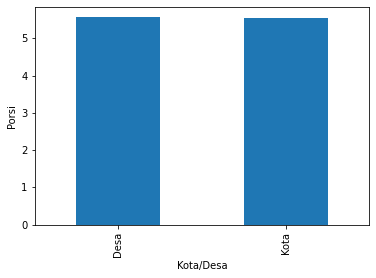

In [ ]:
summary_konsumsi_mie_kotadesa.plot.bar()
plt.ylabel('Porsi')

# Distribusi berobat jalan kota/desa

In [ ]:
tabel_kotadesa

,Urut,Total Konsumsi Mie (Porsi),Pernah Berobat Jalan 6 Bulan Terakhir?,Weighting,Kota/Desa
0,4.401331e+07,2.0,Tidak,191.37656,Desa
34,6.009615e+07,4.0,Tidak,189.35805,Desa
65,6.410896e+07,4.0,Tidak,479.29642,Desa
117,8.008659e+07,2.0,Tidak,3332.32100,Kota
170,8.020182e+07,8.0,Tidak,6566.43700,Kota
...,...,...,...,...,...
103620,1.472519e+11,4.0,Tidak,405.47833,Desa
103653,1.582783e+11,8.0,Tidak,682.96880,Desa
103688,1.610523e+11,4.0,Tidak,628.57110,Desa
103731,1.669771e+11,6.0,Tidak,256.22934,Kota


In [ ]:
persentase_berobat_kotadesa = tabel_kotadesa.groupby(['Kota/Desa', 'Pernah Berobat Jalan 6 Bulan Terakhir?']).sum()['Weighting']
persentase_berobat_kotadesa

Kota/Desa  Pernah Berobat Jalan 6 Bulan Terakhir?
Desa       Tidak                                     5.894940e+05
           Ya                                        2.221880e+05
Kota       Tidak                                     1.143885e+06
           Ya                                        3.724784e+05
Name: Weighting, dtype: float64

Text(0, 0.5, 'Jumlah Penduduk (10 Juta)')

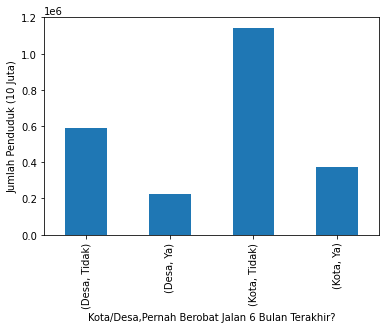

In [ ]:
persentase_berobat_kotadesa.plot.bar()
plt.ylabel('Jumlah Penduduk (10 Juta)')

<AxesSubplot:xlabel='Lokasi', ylabel='Persentase'>

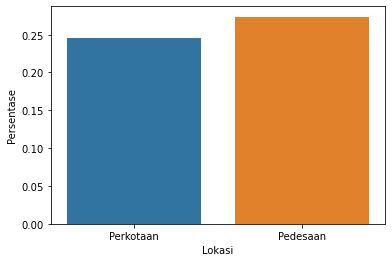

In [ ]:
persentase_berobat_desa = persentase_berobat_kotadesa['Desa']['Ya']/(persentase_berobat_kotadesa['Desa']['Ya']+persentase_berobat_kotadesa['Desa']['Tidak'])
persentase_berobat_kota = persentase_berobat_kotadesa['Kota']['Ya']/(persentase_berobat_kotadesa['Kota']['Ya']+persentase_berobat_kotadesa['Kota']['Tidak'])

persentase_berobat = pd.DataFrame({
    'Lokasi': ['Perkotaan', 'Pedesaan'],
    'Persentase': [persentase_berobat_kota, persentase_berobat_desa]
})

sns.barplot(x= persentase_berobat['Lokasi'], y= persentase_berobat['Persentase'])

# Korelasi Konsumsi Mie dengan Berobat Jalan

In [ ]:
tabel_kotadesa.describe()

,Urut,Total Konsumsi Mie (Porsi),Weighting
count,2.192000e+03,2192.000000,2192.000000
mean,1.686633e+10,5.559799,1062.064370
std,2.265544e+10,6.130098,1003.627128
min,4.401331e+07,0.200000,1.455725
25%,2.361477e+09,2.000000,373.562028
50%,8.061078e+09,4.000000,668.412150
75%,2.131408e+10,6.000000,1476.900450
max,2.333853e+11,140.000000,6655.651400


<AxesSubplot:xlabel='Total Konsumsi Mie (Porsi)', ylabel='Count'>

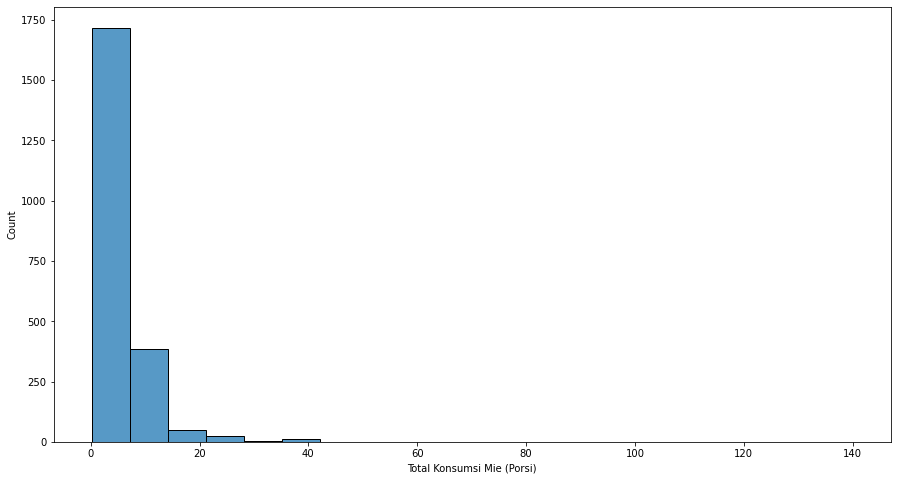

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(tabel_kotadesa['Total Konsumsi Mie (Porsi)'], bins=20)

In [ ]:
tabel_kotadesa['Total Konsumsi Mie (Porsi)']

0         2.0
34        4.0
65        4.0
117       2.0
170       8.0
         ... 
103620    4.0
103653    8.0
103688    4.0
103731    6.0
103781    2.0
Name: Total Konsumsi Mie (Porsi), Length: 2192, dtype: float64

In [ ]:
kuartil = pd.qcut(tabel_kotadesa['Total Konsumsi Mie (Porsi)'], 20, duplicates='drop', retbins= False)

In [ ]:
kuartil

0         (0.199, 2.0]
34          (2.0, 4.0]
65          (2.0, 4.0]
117       (0.199, 2.0]
170         (6.0, 8.0]
              ...     
103620      (2.0, 4.0]
103653      (6.0, 8.0]
103688      (2.0, 4.0]
103731      (4.0, 6.0]
103781    (0.199, 2.0]
Name: Total Konsumsi Mie (Porsi), Length: 2192, dtype: category
Categories (7, interval[float64]): [(0.199, 2.0] < (2.0, 4.0] < (4.0, 6.0] < (6.0, 8.0] < (8.0, 10.0] < (10.0, 14.0] < (14.0, 140.0]]

In [ ]:
tabel_kotadesa['kuartil'] = kuartil
tabel_kotadesa['Multiply'] = tabel_kotadesa['Total Konsumsi Mie (Porsi)']*tabel_kotadesa['Weighting']

tabel_kotadesa

,Urut,Total Konsumsi Mie (Porsi),Pernah Berobat Jalan 6 Bulan Terakhir?,Weighting,Kota/Desa,kuartil,Multiply
0,4.401331e+07,2.0,Tidak,191.37656,Desa,"(0.199, 2.0]",382.75312
34,6.009615e+07,4.0,Tidak,189.35805,Desa,"(2.0, 4.0]",757.43220
65,6.410896e+07,4.0,Tidak,479.29642,Desa,"(2.0, 4.0]",1917.18568
117,8.008659e+07,2.0,Tidak,3332.32100,Kota,"(0.199, 2.0]",6664.64200
170,8.020182e+07,8.0,Tidak,6566.43700,Kota,"(6.0, 8.0]",52531.49600
...,...,...,...,...,...,...,...
103620,1.472519e+11,4.0,Tidak,405.47833,Desa,"(2.0, 4.0]",1621.91332
103653,1.582783e+11,8.0,Tidak,682.96880,Desa,"(6.0, 8.0]",5463.75040
103688,1.610523e+11,4.0,Tidak,628.57110,Desa,"(2.0, 4.0]",2514.28440
103731,1.669771e+11,6.0,Tidak,256.22934,Kota,"(4.0, 6.0]",1537.37604


In [ ]:
tabel_kuartil = tabel_kotadesa.groupby(['kuartil', 'Pernah Berobat Jalan 6 Bulan Terakhir?']).sum()['Multiply']
tabel_kuartil

kuartil        Pernah Berobat Jalan 6 Bulan Terakhir?
(0.199, 2.0]   Tidak                                     1.211485e+06
               Ya                                        4.384867e+05
(2.0, 4.0]     Tidak                                     2.109599e+06
               Ya                                        7.650891e+05
(4.0, 6.0]     Tidak                                     1.300680e+06
               Ya                                        4.643893e+05
(6.0, 8.0]     Tidak                                     1.166912e+06
               Ya                                        3.076800e+05
(8.0, 10.0]    Tidak                                     8.700612e+05
               Ya                                        1.420714e+05
(10.0, 14.0]   Tidak                                     8.645563e+05
               Ya                                        3.493892e+05
(14.0, 140.0]  Tidak                                     1.811250e+06
               Ya                   

In [ ]:
Quartil= []
persentase_berobat = []

for K in range(0,len(tabel_kuartil.index)):
    Quartil.append(str(tabel_kuartil.index[K][0])[1:-1])
    persentase_berobat.append(tabel_kuartil[tabel_kuartil.index[K][0]][1]/(tabel_kuartil[tabel_kuartil.index[K][0]][1] + tabel_kuartil[tabel_kuartil.index[K][0]][0]))




In [ ]:
Quartil = list(dict.fromkeys(Quartil))
persentase_berobat = list(dict.fromkeys(persentase_berobat))

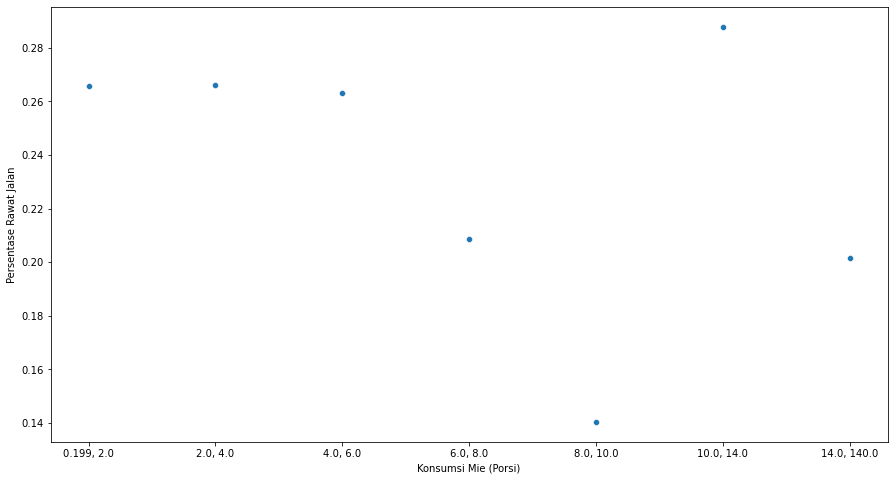

In [ ]:
plt.figure(figsize=[15,8])
sns.scatterplot(x = Quartil, y = persentase_berobat)
plt.xlabel('Konsumsi Mie (Porsi)')
plt.ylabel('Persentase Rawat Jalan')
plt.show()

# Korelasi Jumlah Konsumsi Mie Per Jenis Dengan Rawat Jalan

### Mie Instan

In [ ]:
tabel_instan = mie_instan.merge(sakit_6, how='left', on='urut')
tabel_instan.drop(['weind_y'], axis=1, inplace=True)
tabel_instan.rename(columns={'weind_x': 'weind'}, inplace=True)
tabel_instan['b5r7'] = tabel_instan['b5r7'].map({1: 'Ya', 2: 'Tidak'})
tabel_instan

,urut,kode,b41k8,weind,multiply,b5r7
0,4.401331e+07,206,1.0,956.88275,956.88275,Tidak
1,6.177565e+08,206,4.0,572.25080,2289.00320,Tidak
2,2.643169e+08,206,3.0,1808.55870,5425.67610,Tidak
3,8.800915e+08,206,1.0,2909.84200,2909.84200,Tidak
4,2.201321e+08,206,2.0,2288.79130,4577.58260,Tidak
...,...,...,...,...,...,...
2191,1.276103e+10,206,10.0,892.03424,8920.34240,Tidak
2192,5.098301e+09,206,6.0,2463.35640,14780.13840,Tidak
2193,8.091123e+10,206,3.0,1420.09050,4260.27150,Tidak
2194,2.821584e+09,206,4.0,926.53930,3706.15720,Tidak


In [ ]:
kuartil_instan = pd.qcut(tabel_instan['b41k8'], 20, duplicates='drop', retbins= False)
tabel_instan['kuartil'] = kuartil_instan
tabel_kuartil_instan = tabel_instan.groupby(['kuartil', 'b5r7']).sum()['multiply']
tabel_kuartil_instan

kuartil       b5r7 
(0.099, 1.0]  Tidak    2.378780e+06
              Ya       8.348306e+05
(1.0, 2.0]    Tidak    4.072423e+06
              Ya       1.520952e+06
(2.0, 3.0]    Tidak    2.808582e+06
              Ya       1.046457e+06
(3.0, 4.0]    Tidak    2.536876e+06
              Ya       7.431827e+05
(4.0, 5.0]    Tidak    2.001273e+06
              Ya       3.245903e+05
(5.0, 7.0]    Tidak    1.743807e+06
              Ya       6.904225e+05
(7.0, 70.0]   Tidak    4.215807e+06
              Ya       9.143607e+05
Name: multiply, dtype: float64

In [ ]:
Quartil_instan = []
persentase_berobat_instan = []

for K in range(0,len(tabel_kuartil_instan.index)):
    Quartil_instan.append(str(tabel_kuartil_instan.index[K][0])[1:-1])
    persentase_berobat_instan.append(tabel_kuartil_instan[tabel_kuartil_instan.index[K][0]][1]/(tabel_kuartil_instan[tabel_kuartil_instan.index[K][0]][1] + tabel_kuartil_instan[tabel_kuartil_instan.index[K][0]][0]))

Quartil_instan = list(dict.fromkeys(Quartil_instan))
persentase_berobat_instan = list(dict.fromkeys(persentase_berobat_instan))

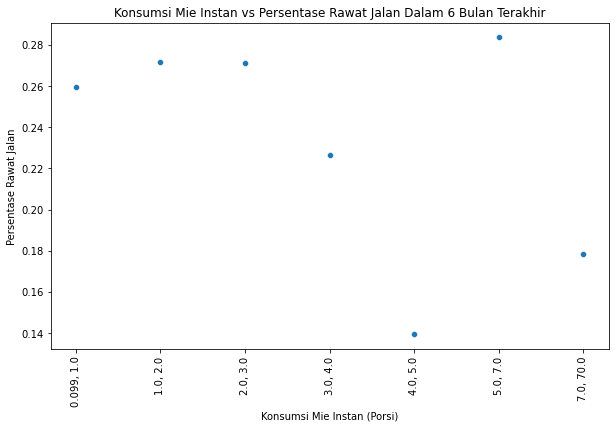

In [ ]:
plt.figure(figsize=[10,6])
sns.scatterplot(x = Quartil_instan, y = persentase_berobat_instan)
plt.xlabel('Konsumsi Mie Instan (Porsi)')
plt.ylabel('Persentase Rawat Jalan')
plt.xticks(rotation = 90)
plt.title('Konsumsi Mie Instan vs Persentase Rawat Jalan Dalam 6 Bulan Terakhir')
plt.show()

### Mie Bakso

In [ ]:
tabel_bakso = mie_bakso.merge(sakit_6, how='left', on='urut')
tabel_bakso.drop(['weind_y'], axis=1, inplace=True)
tabel_bakso.rename(columns={'weind_x': 'weind'}, inplace=True)
tabel_bakso['b5r7'] = tabel_bakso['b5r7'].map({1: 'Ya', 2: 'Tidak'})
tabel_bakso

,urut,kode,b41k8,weind,multiply,b5r7
0,2.640799e+08,205,1.0,819.12610,819.12610,Ya
1,3.852624e+08,205,9.0,826.53910,7438.85190,Tidak
2,8.825093e+07,205,5.0,873.65643,4368.28215,Tidak
3,1.765019e+08,205,28.0,2607.70500,73015.74000,Tidak
4,2.647528e+08,205,10.0,634.30640,6343.06400,Tidak
...,...,...,...,...,...,...
23764,1.670369e+11,205,2.0,849.84000,1699.68000,Tidak
23765,1.669035e+10,205,1.0,4480.41260,4480.41260,Tidak
23766,6.676138e+10,205,2.0,3671.86160,7343.72320,Ya
23767,8.345173e+10,205,2.0,1272.24670,2544.49340,Tidak
